In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import time
import os
import random

## Building the 294 datasets
Looping over the files in json and the files in npy to create only one file in json

1) ouvrir 1 fichier json et son correspondant en npy

In [131]:
%%time
category_0 = map(json.loads, open('../raw_data/json format/airplane.ndjson'))
df_0 = pd.DataFrame.from_records(category_0)
df_0

CPU times: user 6.22 s, sys: 3.36 s, total: 9.59 s
Wall time: 9.26 s


,word,countrycode,timestamp,recognized,key_id,drawing
0,airplane,US,2017-03-08 21:12:07.26604 UTC,True,5152802093400064,"[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ..."
1,airplane,CA,2017-03-06 21:39:04.69013 UTC,False,6622904974311424,"[[[2, 14, 34, 126], [57, 45, 38, 47]], [[41, 4..."
2,airplane,US,2017-03-23 02:08:35.22998 UTC,True,6577010312740864,"[[[90, 88, 95, 104, 112, 122], [65, 31, 12, 0,..."
3,airplane,US,2017-03-10 00:35:17.53197 UTC,True,5643224746033152,"[[[82, 49, 15, 4, 0, 5, 30, 85, 89, 93, 112, 1..."
4,airplane,IL,2017-01-23 18:11:11.65817 UTC,True,6670046841536512,"[[[64, 38, 23, 8, 0, 6, 26, 68], [74, 77, 84, ..."
...,...,...,...,...,...,...
151618,airplane,US,2017-03-02 14:53:50.22551 UTC,True,5493275190362112,"[[[22, 8, 0, 28, 50, 112, 184, 204, 228, 248, ..."
151619,airplane,PH,2017-03-29 15:40:12.81854 UTC,True,4804582200836096,"[[[0, 18, 38, 75], [92, 68, 56, 55]], [[2, 10,..."
151620,airplane,IE,2017-01-24 21:11:31.57644 UTC,True,6511303608762368,"[[[87, 39, 24, 5, 0, 4, 21, 45, 93, 177, 194, ..."
151621,airplane,US,2017-01-25 16:45:20.33377 UTC,True,4731074292744192,"[[[186, 82, 37, 20, 7, 1, 0, 3, 16, 29, 137, 2..."


In [132]:
np_data_0 = np.load('../raw_data/npy format/airplane.npy')
np_data_0

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [133]:
np_data_0.shape

(151623, 784)

2) les merger

In [134]:
df_0['np_dwg'] = pd.Series(list(np_data_0))

In [135]:
df_0

,word,countrycode,timestamp,recognized,key_id,drawing,np_dwg
0,airplane,US,2017-03-08 21:12:07.26604 UTC,True,5152802093400064,"[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,airplane,CA,2017-03-06 21:39:04.69013 UTC,False,6622904974311424,"[[[2, 14, 34, 126], [57, 45, 38, 47]], [[41, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,airplane,US,2017-03-23 02:08:35.22998 UTC,True,6577010312740864,"[[[90, 88, 95, 104, 112, 122], [65, 31, 12, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,airplane,US,2017-03-10 00:35:17.53197 UTC,True,5643224746033152,"[[[82, 49, 15, 4, 0, 5, 30, 85, 89, 93, 112, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,airplane,IL,2017-01-23 18:11:11.65817 UTC,True,6670046841536512,"[[[64, 38, 23, 8, 0, 6, 26, 68], [74, 77, 84, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
151618,airplane,US,2017-03-02 14:53:50.22551 UTC,True,5493275190362112,"[[[22, 8, 0, 28, 50, 112, 184, 204, 228, 248, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
151619,airplane,PH,2017-03-29 15:40:12.81854 UTC,True,4804582200836096,"[[[0, 18, 38, 75], [92, 68, 56, 55]], [[2, 10,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
151620,airplane,IE,2017-01-24 21:11:31.57644 UTC,True,6511303608762368,"[[[87, 39, 24, 5, 0, 4, 21, 45, 93, 177, 194, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
151621,airplane,US,2017-01-25 16:45:20.33377 UTC,True,4731074292744192,"[[[186, 82, 37, 20, 7, 1, 0, 3, 16, 29, 137, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


2.1) vérifier les correspondances, puis filtrer les lignes indésirables

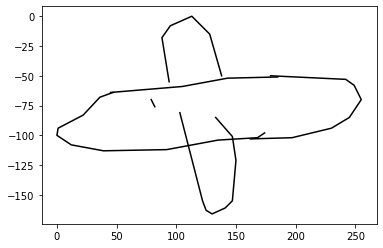

In [136]:
drawing = df_0['drawing'][156]
for trait in drawing:
    plt.plot(trait[0], [-1*y for y in trait[1]], color = 'black')

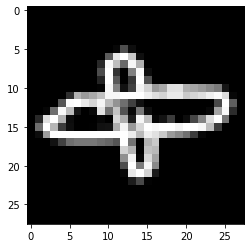

In [137]:
img = np.array(df_0['np_dwg'][156]).reshape(28, 28)
plt.imshow(img, cmap='gray')

In [138]:
df_0 = df_0[df_0['recognized'] == True]

In [139]:
df_0

,word,countrycode,timestamp,recognized,key_id,drawing,np_dwg
0,airplane,US,2017-03-08 21:12:07.26604 UTC,True,5152802093400064,"[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,airplane,US,2017-03-23 02:08:35.22998 UTC,True,6577010312740864,"[[[90, 88, 95, 104, 112, 122], [65, 31, 12, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,airplane,US,2017-03-10 00:35:17.53197 UTC,True,5643224746033152,"[[[82, 49, 15, 4, 0, 5, 30, 85, 89, 93, 112, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,airplane,IL,2017-01-23 18:11:11.65817 UTC,True,6670046841536512,"[[[64, 38, 23, 8, 0, 6, 26, 68], [74, 77, 84, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,airplane,US,2017-03-02 19:06:55.49465 UTC,True,5509429904539648,"[[[195, 164, 127, 40, 13, 0, 4, 28, 93, 172, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
151618,airplane,US,2017-03-02 14:53:50.22551 UTC,True,5493275190362112,"[[[22, 8, 0, 28, 50, 112, 184, 204, 228, 248, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
151619,airplane,PH,2017-03-29 15:40:12.81854 UTC,True,4804582200836096,"[[[0, 18, 38, 75], [92, 68, 56, 55]], [[2, 10,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
151620,airplane,IE,2017-01-24 21:11:31.57644 UTC,True,6511303608762368,"[[[87, 39, 24, 5, 0, 4, 21, 45, 93, 177, 194, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
151621,airplane,US,2017-01-25 16:45:20.33377 UTC,True,4731074292744192,"[[[186, 82, 37, 20, 7, 1, 0, 3, 16, 29, 137, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


2.2) limiter à 10k lignes

In [141]:
df_0 = df_0.loc[:10000]

3) écrire le fichier mergé en json dans le bon dossier

In [151]:
df_0.to_json('../raw_data/Compiled format/airplane.ndjson',
           orient="records",
           lines=True)

In [152]:
category_test = map(json.loads, open('../raw_data/Compiled format/airplane.ndjson'))
df_test = pd.DataFrame.from_records(category_test)

In [153]:
df_test

,word,countrycode,timestamp,recognized,key_id,drawing,np_dwg
0,airplane,US,2017-03-08 21:12:07.26604 UTC,True,5152802093400064,"[[[167, 109, 80, 69, 58, 31, 57, 117, 99, 52, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,airplane,US,2017-03-23 02:08:35.22998 UTC,True,6577010312740864,"[[[90, 88, 95, 104, 112, 122], [65, 31, 12, 0,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,airplane,US,2017-03-10 00:35:17.53197 UTC,True,5643224746033152,"[[[82, 49, 15, 4, 0, 5, 30, 85, 89, 93, 112, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,airplane,IL,2017-01-23 18:11:11.65817 UTC,True,6670046841536512,"[[[64, 38, 23, 8, 0, 6, 26, 68], [74, 77, 84, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,airplane,US,2017-03-02 19:06:55.49465 UTC,True,5509429904539648,"[[[195, 164, 127, 40, 13, 0, 4, 28, 93, 172, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...
8972,airplane,US,2017-01-27 18:17:35.32934 UTC,True,5354202274463744,"[[[163, 163], [182, 181]], [[147, 143, 146, 15...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8973,airplane,BR,2017-01-26 00:20:55.19129 UTC,True,5426569352839168,"[[[14, 63, 129, 205], [64, 63, 56, 54]], [[206...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8974,airplane,RU,2017-03-16 14:27:27.55236 UTC,True,4570916770021376,"[[[120, 52, 28, 0, 2, 10, 35, 55, 203], [71, 7...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8975,airplane,RU,2017-01-26 06:50:16.83994 UTC,True,4664581219680256,"[[[104, 80, 38, 11, 3, 0, 4, 21, 102], [68, 64...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


4) looper

In [165]:
!ls

'Etienne Draft.ipynb'


In [168]:
# boucle qui crée des datasets de 10k lignes en fusionnant les dessins vectoriels et pixélisés, 
# et les enregistre dans le bon dossier
%%time

nlignes = 10_000

tot = len(os.listdir('../raw_data/npy format'))
i = 1


for npy_file, json_file in zip(sorted(os.listdir('../raw_data/npy format')), sorted(os.listdir('../raw_data/json format'))):
    
    start = time.time()
    print(f"doing {i}/{tot}...")
    i = i+1
    print(npy_file, json_file, '...')
    
    #opening the files
    category = map(json.loads, open('../raw_data/json format/'+str(json_file)))
    df = pd.DataFrame.from_records(category)
    np_data = np.load('../raw_data/npy format/'+str(npy_file))
    
    #merging
    df['np_dwg'] = pd.Series(list(np_data))
    
    #filtering
    df = df[df['recognized'] == True]
    
    #limiting to 10k lines
    df = df.head(nlignes)
    
    df.reset_index(drop=True, inplace = True)
    
    #writing the new file in ndjson
    df.to_json('../raw_data/Compiled format/'+npy_file.split('.')[0]+'.ndjson',
           orient="records",
           lines=True)
    
    print(f"finito, en {time.time() - start} secondes")

doing 1/294...
airplane.npy airplane.ndjson ...
finito, en 94.744375705719 secondes
doing 2/294...
ambulance.npy ambulance.ndjson ...
finito, en 17.33797597885132 secondes
doing 3/294...
angel.npy angel.ndjson ...
finito, en 10.365846395492554 secondes
doing 4/294...
ant.npy ant.ndjson ...
finito, en 24.316879987716675 secondes
doing 5/294...
anvil.npy anvil.ndjson ...
finito, en 6.8027098178863525 secondes
doing 6/294...
apple.npy apple.ndjson ...
finito, en 5.299197435379028 secondes
doing 7/294...
arm.npy arm.ndjson ...
finito, en 19.638988733291626 secondes
doing 8/294...
asparagus.npy asparagus.ndjson ...
finito, en 13.867887496948242 secondes
doing 9/294...
axe.npy axe.ndjson ...
finito, en 3.33331036567688 secondes
doing 10/294...
backpack.npy backpack.ndjson ...
finito, en 4.280959367752075 secondes
doing 11/294...
banana.npy banana.ndjson ...
finito, en 28.35089349746704 secondes
doing 12/294...
bandage.npy bandage.ndjson ...
finito, en 75.55982899665833 secondes
doing 13/294.

finito, en 10.203537464141846 secondes
doing 100/294...
fan.npy fan.ndjson ...
finito, en 44.032859802246094 secondes
doing 101/294...
feather.npy feather.ndjson ...
finito, en 5.8073320388793945 secondes
doing 102/294...
fence.npy fence.ndjson ...
finito, en 25.843209743499756 secondes
doing 103/294...
finger.npy finger.ndjson ...
finito, en 7.425633907318115 secondes
doing 104/294...
fireplace.npy fireplace.ndjson ...
finito, en 14.756658792495728 secondes
doing 105/294...
firetruck.npy firetruck.ndjson ...
finito, en 46.89279127120972 secondes
doing 106/294...
fish.npy fish.ndjson ...
finito, en 6.267749547958374 secondes
doing 107/294...
flamingo.npy flamingo.ndjson ...
finito, en 59.17901301383972 secondes
doing 108/294...
flashlight.npy flashlight.ndjson ...
finito, en 38.5678493976593 secondes
doing 109/294...
flower.npy flower.ndjson ...
finito, en 65.7728853225708 secondes
doing 110/294...
foot.npy foot.ndjson ...
finito, en 9.11024808883667 secondes
doing 111/294...
fork.npy 

finito, en 27.77203369140625 secondes
doing 197/294...
pliers.npy pliers.ndjson ...
finito, en 8.476301908493042 secondes
doing 198/294...
pond.npy pond.ndjson ...
finito, en 17.609776496887207 secondes
doing 199/294...
pool.npy pool.ndjson ...
finito, en 5.711570501327515 secondes
doing 200/294...
popsicle.npy popsicle.ndjson ...
finito, en 3.697615623474121 secondes
doing 201/294...
postcard.npy postcard.ndjson ...
finito, en 8.297762155532837 secondes
doing 202/294...
potato.npy potato.ndjson ...
finito, en 26.05965256690979 secondes
doing 203/294...
purse.npy purse.ndjson ...
finito, en 4.458508253097534 secondes
doing 204/294...
rabbit.npy rabbit.ndjson ...
finito, en 21.07136106491089 secondes
doing 205/294...
raccoon.npy raccoon.ndjson ...
finito, en 15.723167419433594 secondes
doing 206/294...
radio.npy radio.ndjson ...
finito, en 5.625356435775757 secondes
doing 207/294...
rain.npy rain.ndjson ...
finito, en 11.620761394500732 secondes
doing 208/294...
rainbow.npy rainbow.ndjs

finito, en 27.175988912582397 secondes
doing 293/294...
zebra.npy zebra.ndjson ...
finito, en 25.768071174621582 secondes
doing 294/294...
zigzag.npy zigzag.ndjson ...
finito, en 4.4254209995269775 secondes
CPU times: user 54min 21s, sys: 8min 39s, total: 1h 3min
Wall time: 1h 7min 26s


In [18]:
def print_vect_pix (df, start_index, k=10):
    """
    fonction qui prend un DataFrame avec une colonne drawing et une colonne np_dwg
    imprime une mozaïque pour comparer les deux
    """
    picks = range(start_index, start_index+k)

    fig, axs = plt.subplots(2,k, figsize = (20, 4))

    for pick, ax in zip(picks, axs[0]):
        drawing = df['drawing'][pick]
        for trait in drawing:
            ax.plot(trait[0], [-1*y for y in trait[1]], color = 'black')
        ax.title.set_text(f"pick {pick}")

    for pick, ax in zip(picks, axs[1]):
        img = np.array(df['np_dwg'][pick]).reshape(28, 28)
        ax.imshow(img, cmap='gray')


    plt.show()


catégorie 1/30 : stethoscope


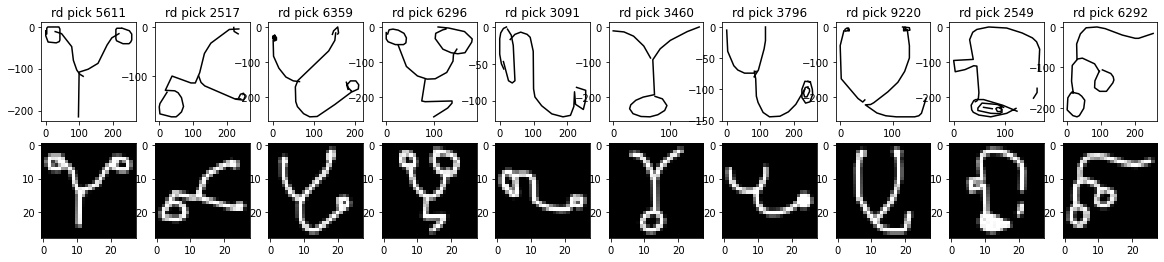

catégorie 2/30 : bench


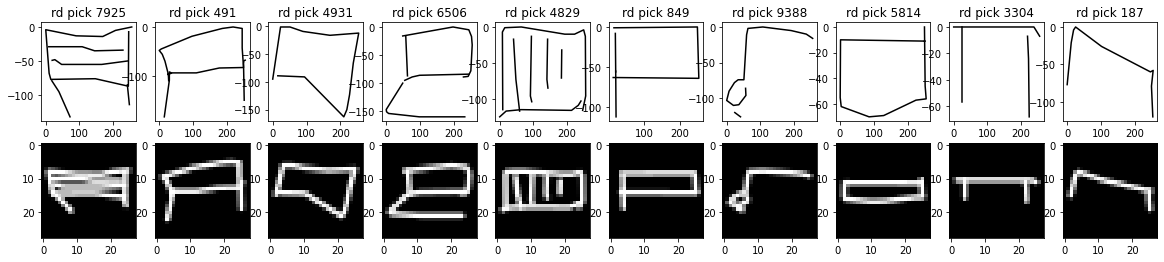

catégorie 3/30 : scissors


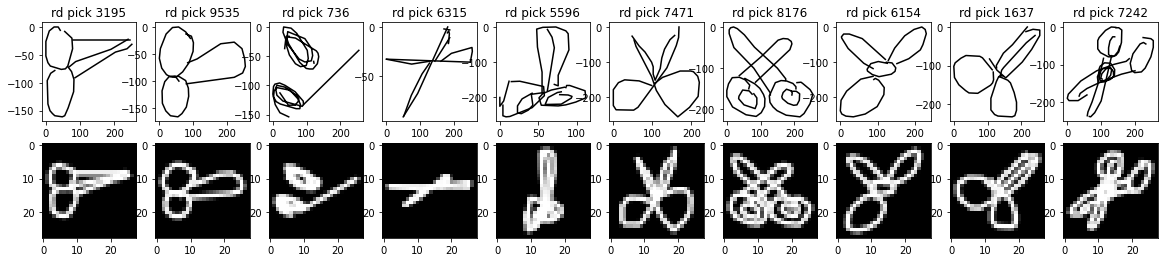

catégorie 4/30 : rifle


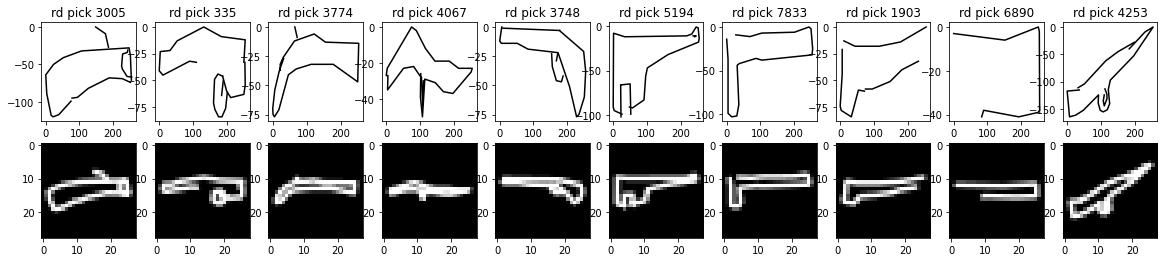

catégorie 5/30 : tree


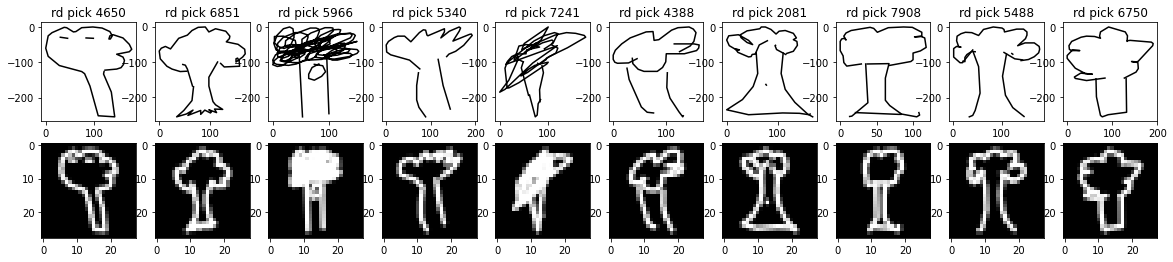

catégorie 6/30 : guitar


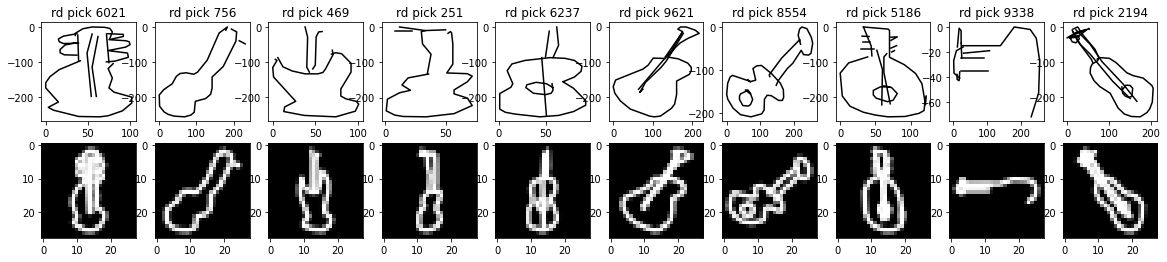

catégorie 7/30 : potato


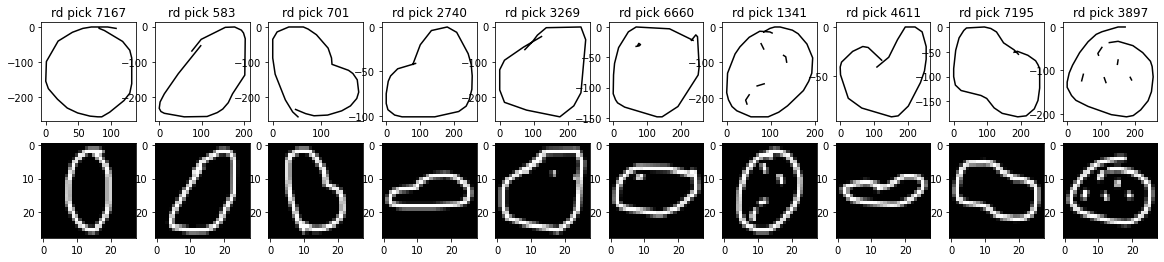

catégorie 8/30 : giraffe


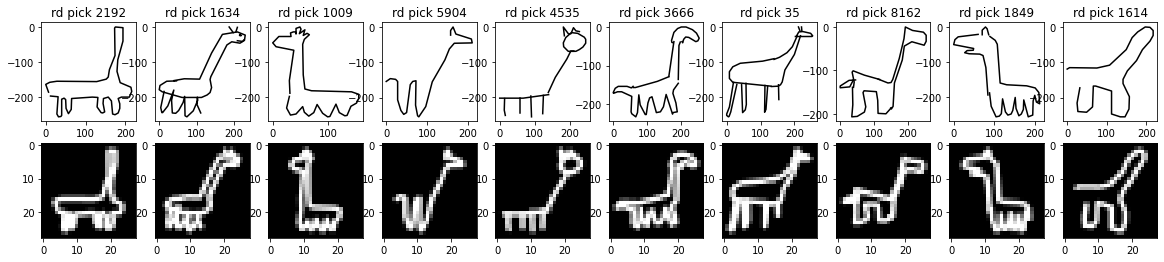

catégorie 9/30 : calendar


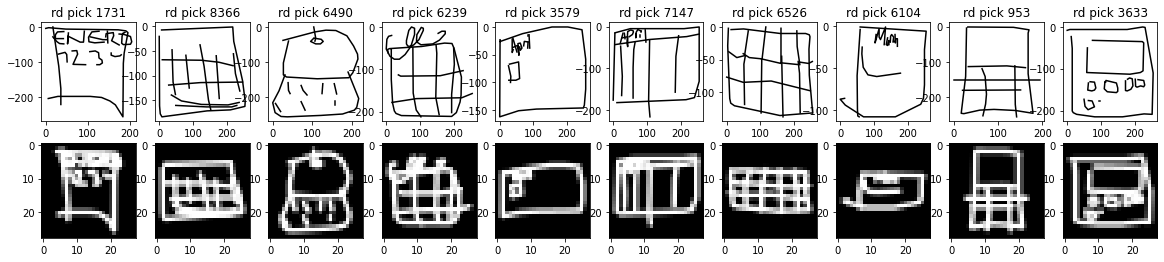

catégorie 10/30 : bucket


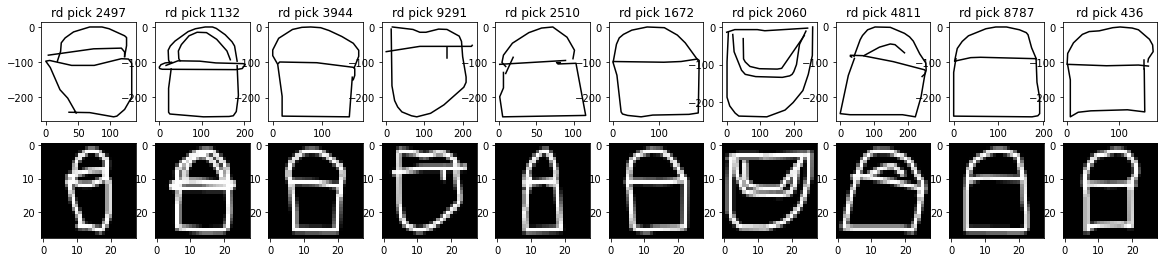

catégorie 11/30 : watermelon


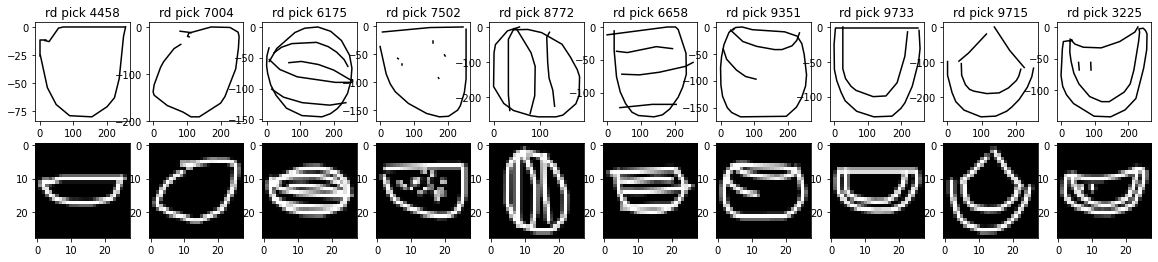

catégorie 12/30 : bus


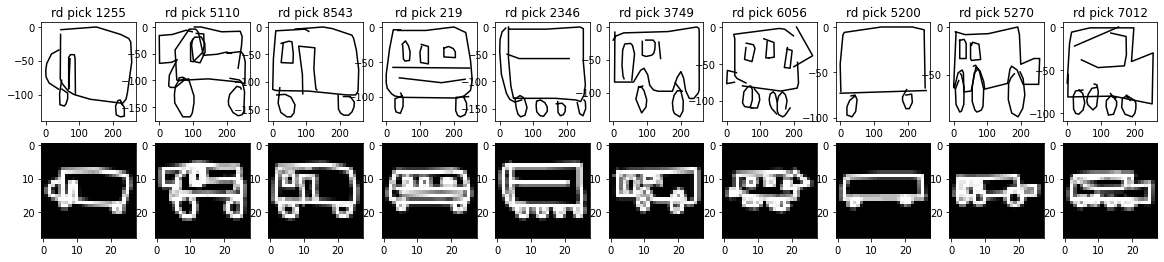

catégorie 13/30 : crayon


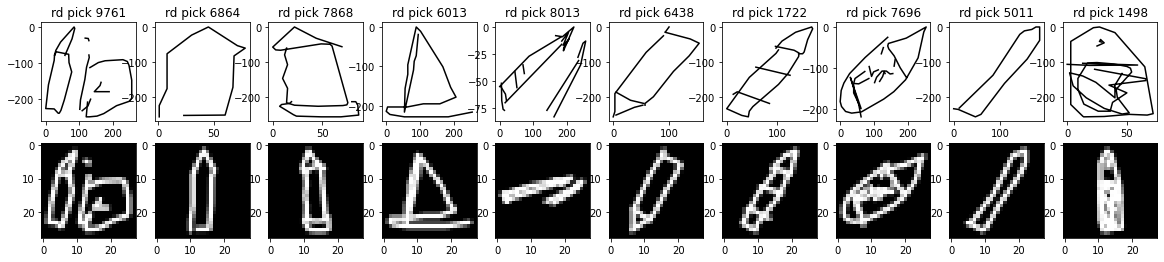

catégorie 14/30 : grass


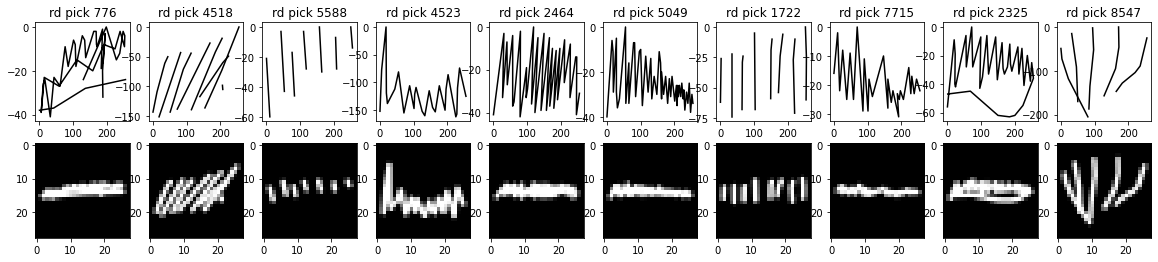

catégorie 15/30 : map


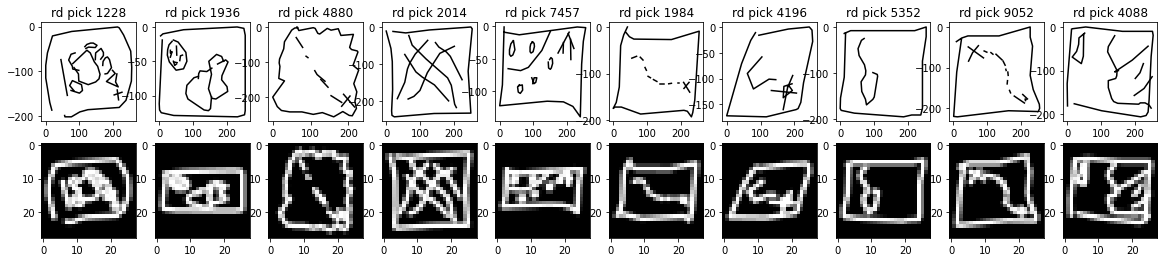

catégorie 16/30 : camouflage


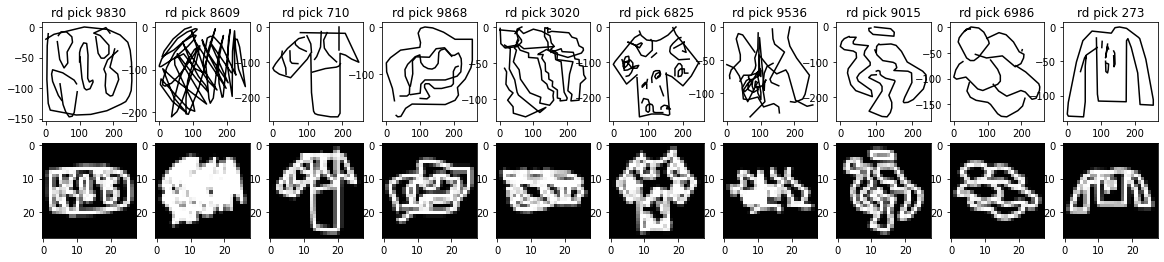

catégorie 17/30 : bottlecap


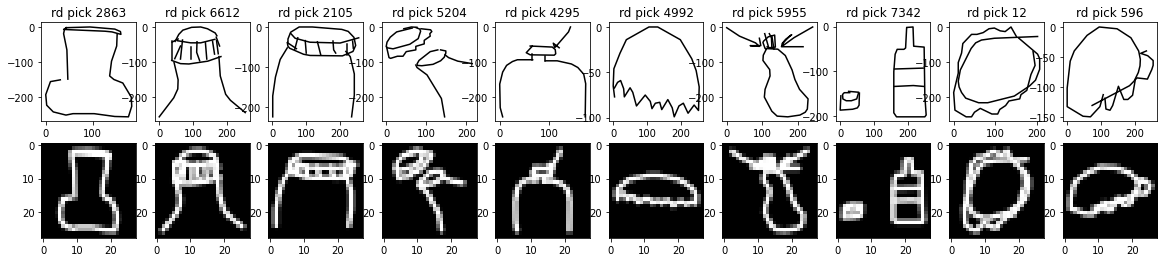

catégorie 18/30 : lightning


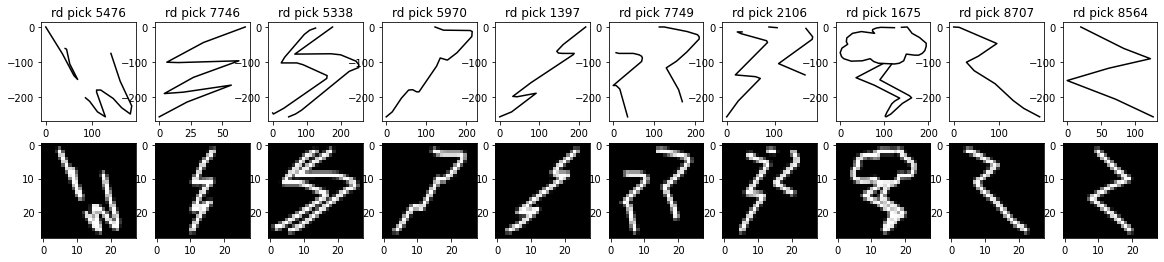

catégorie 19/30 : axe


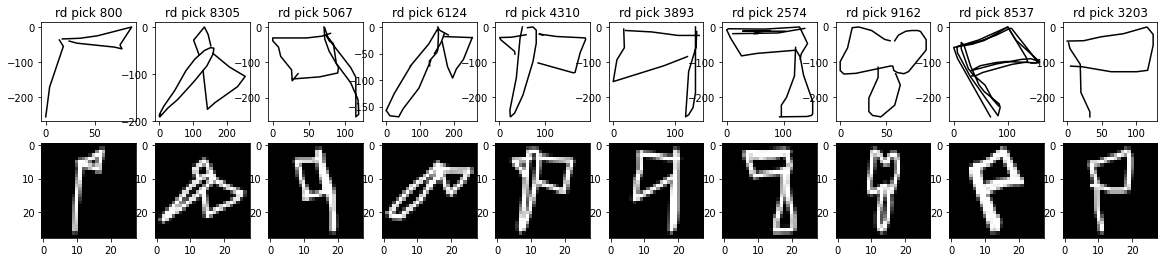

catégorie 20/30 : clock


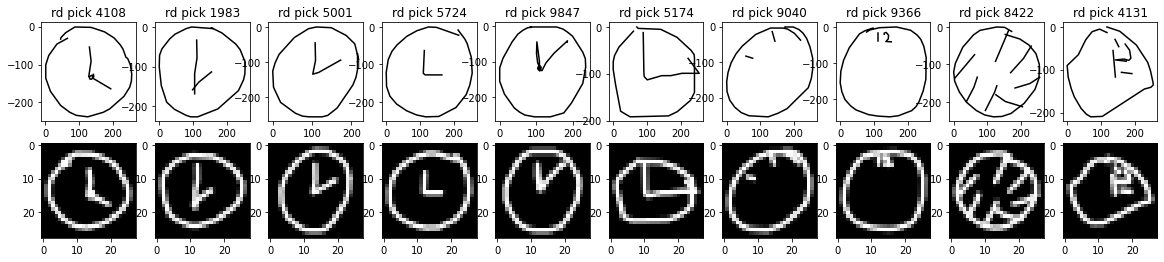

catégorie 21/30 : bat


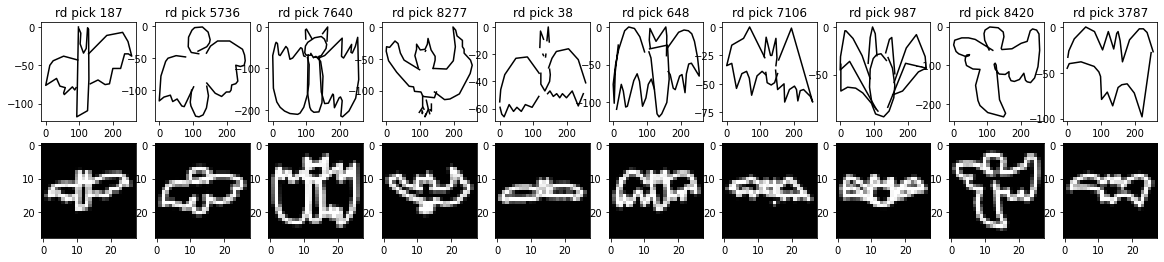

catégorie 22/30 : megaphone


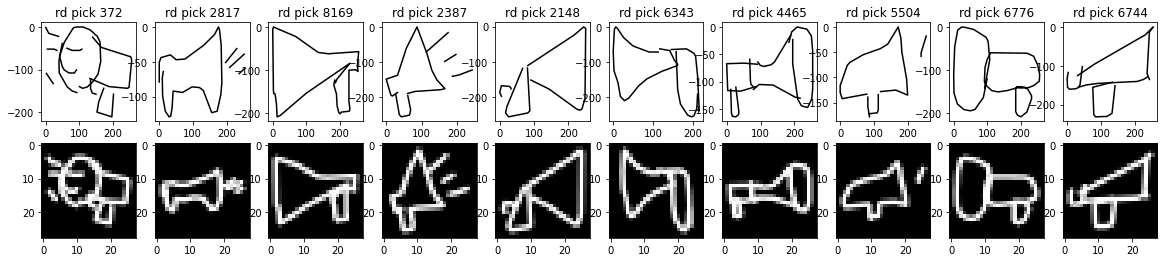

catégorie 23/30 : pliers


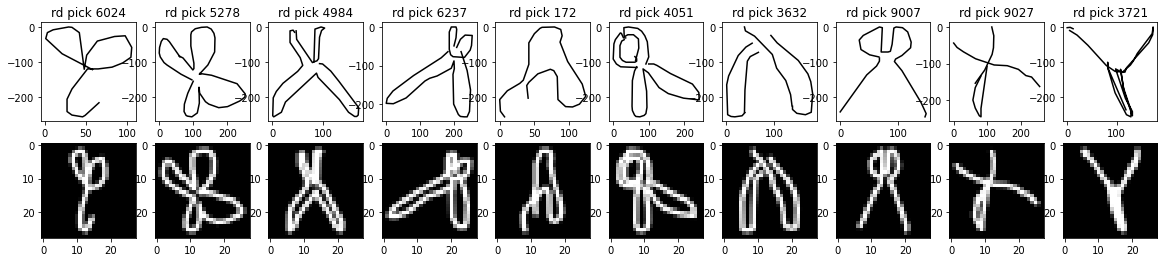

catégorie 24/30 : parrot


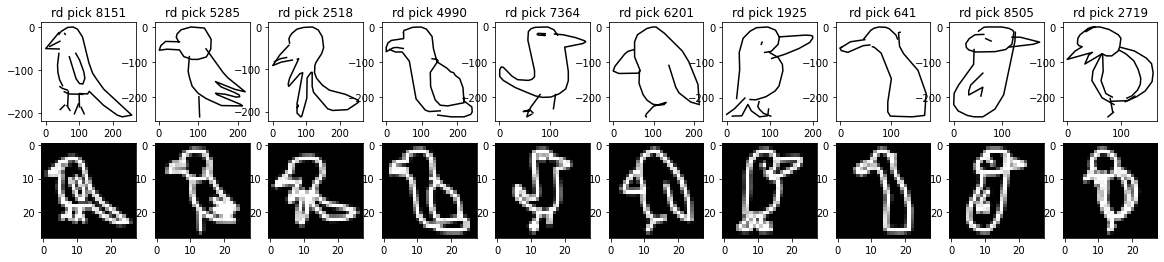

catégorie 25/30 : shorts


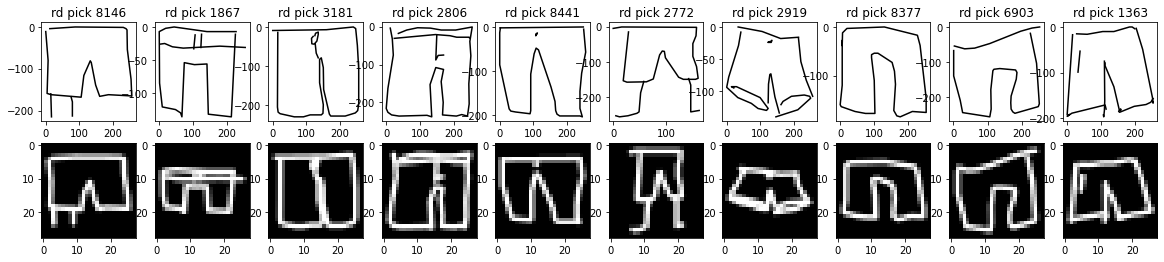

catégorie 26/30 : elephant


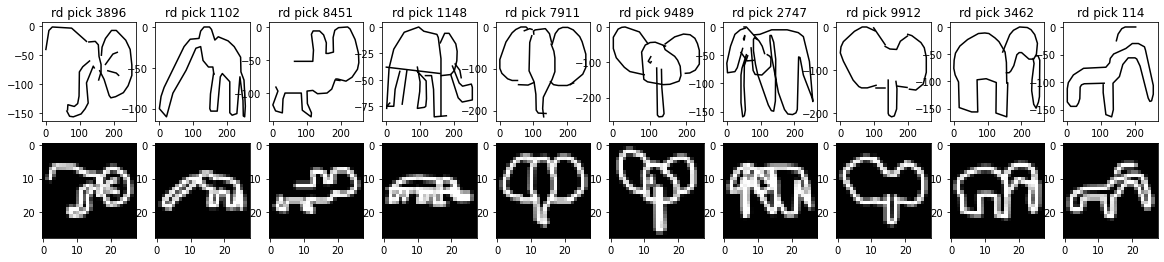

catégorie 27/30 : sock


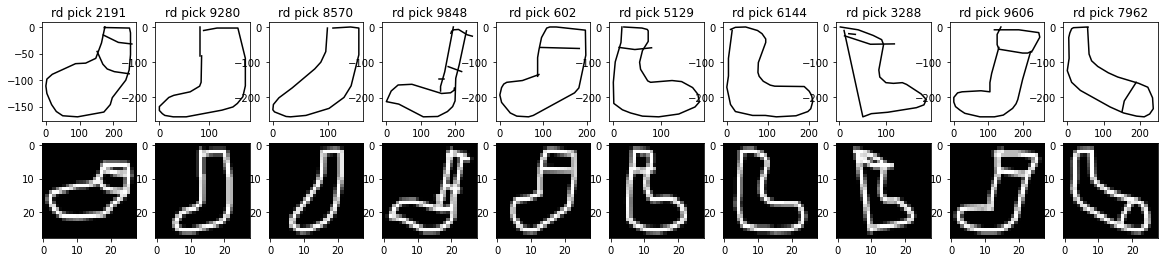

catégorie 28/30 : peas


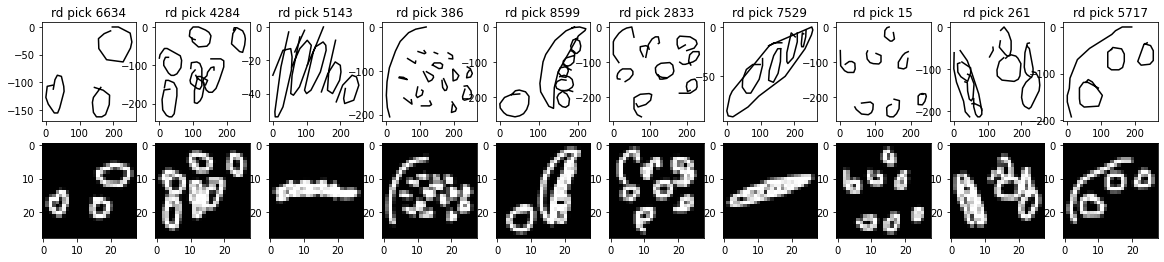

catégorie 29/30 : mushroom


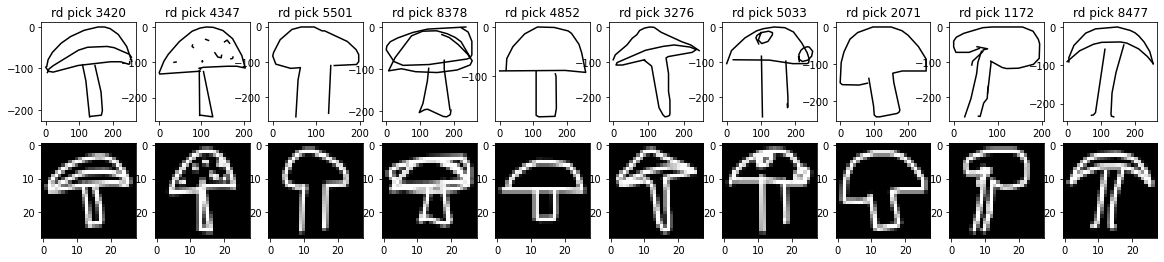

catégorie 30/30 : skyscraper


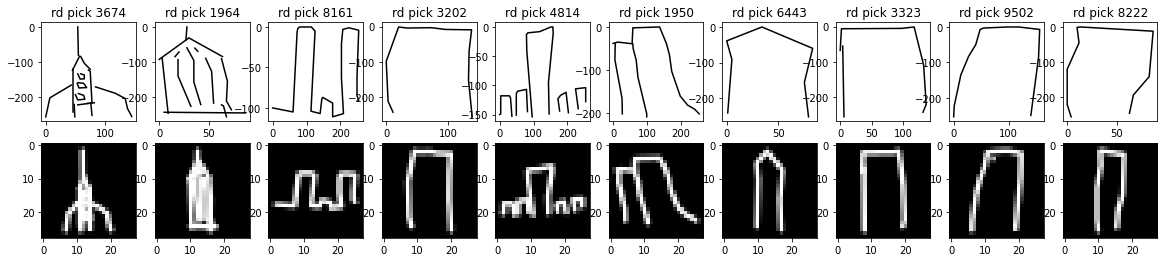

In [14]:
# print un choix aléatoire de catégories, mozaique pour comparer le dessin en pixels et le dessin vectoriel
n_cat = 30

rd_cat = random.choices(sorted(os.listdir('../raw_data/Compiled format')), k=n_cat)
i = 0
for cat in rd_cat:
    
    category_test = map(json.loads, open('../raw_data/Compiled format/'+str(cat)))
    df_test = pd.DataFrame.from_records(category_test)
    i = i+1
    print(f"catégorie {i}/{n_cat} : {cat.split('.')[0]}")
    
    rd_pick = random.choices(range(10000), k=10)
    
    fig, axs = plt.subplots(2,10, figsize = (20, 4))
    
    for pick, ax in zip(rd_pick, axs[0]):
        drawing = df_test['drawing'][pick]
        for trait in drawing:
            ax.plot(trait[0], [-1*y for y in trait[1]], color = 'black')
        ax.title.set_text(f"rd pick {pick}")
    
    for pick, ax in zip(rd_pick, axs[1]):
        img = np.array(df_test['np_dwg'][pick]).reshape(28, 28)
        ax.imshow(img, cmap='gray')
        
    
    plt.show()


## One unique shuffled dataset 

Chosen categories : ['tree', 'guitar', 'giraffe', 'bus', 'bottlecap', 'lightning', 'clock', 'parrot', 'skyscraper']

In [17]:
cats = ['tree', 'guitar', 'giraffe', 'bus', 'bottlecap', 'lightning', 'clock', 'parrot', 'skyscraper'] 

1) assembler les datasets en un seul

In [32]:
conc = []
for cat in cats:
    
    category = map(json.loads, open('../raw_data/Compiled format/'+str(cat)+'.ndjson'))
    conc.append(pd.DataFrame.from_records(category))
df_assembled = pd.concat(conc)
df_assembled.reset_index(drop=True, inplace = True)

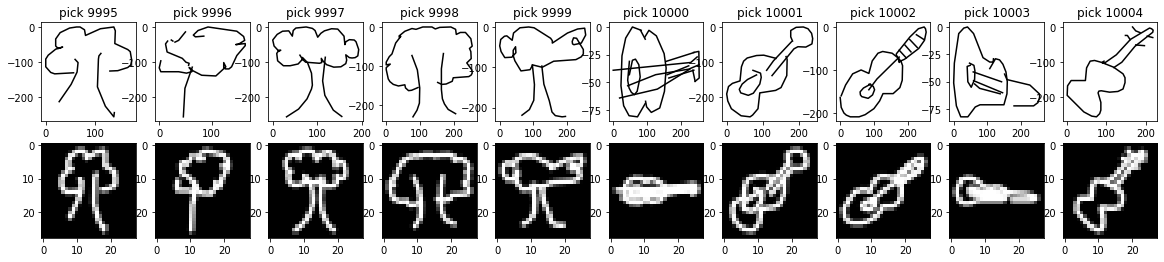

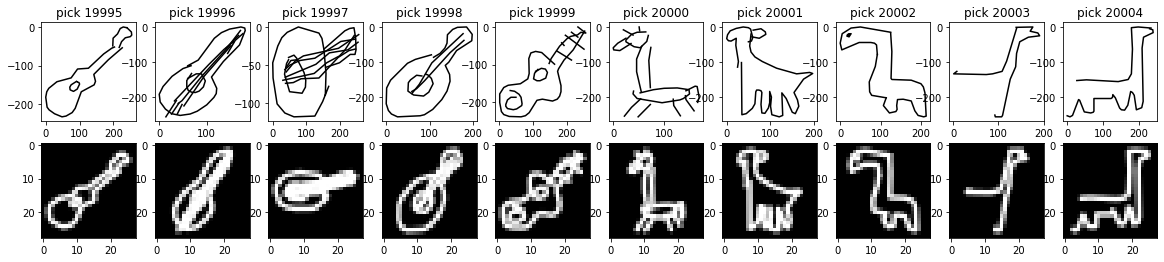

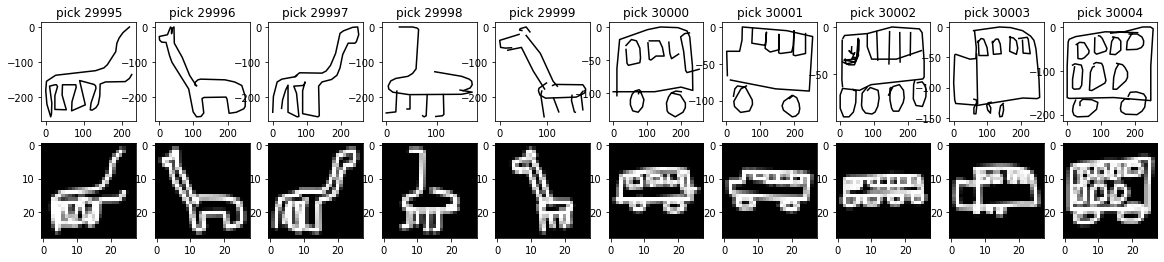

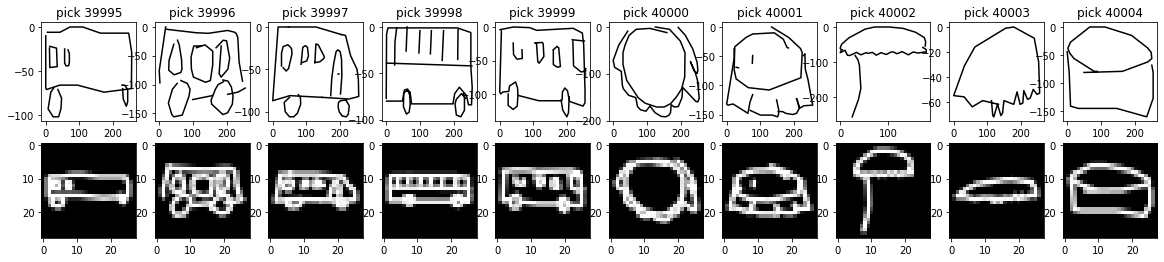

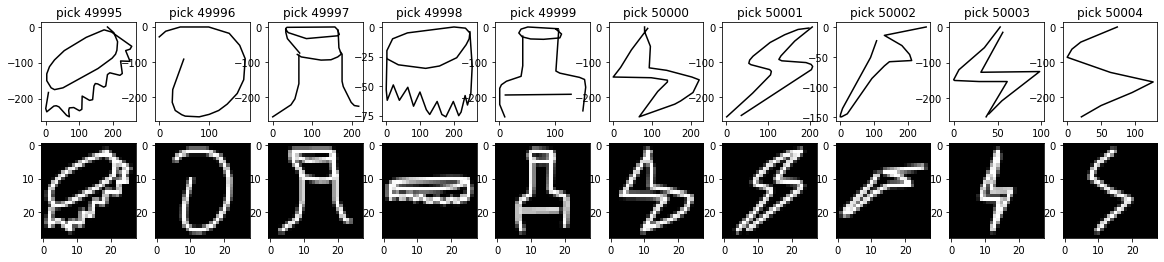

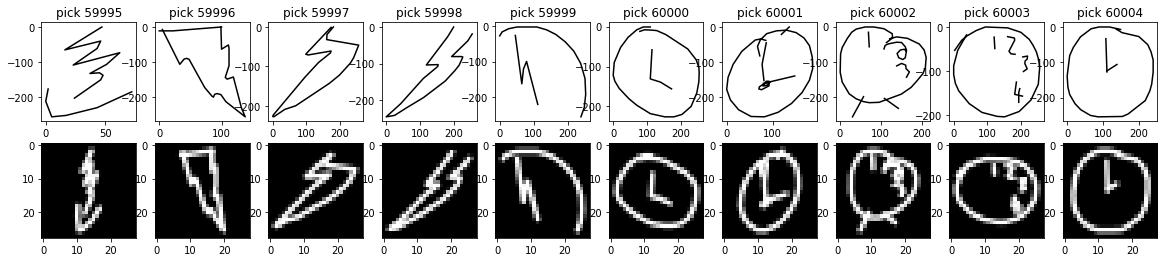

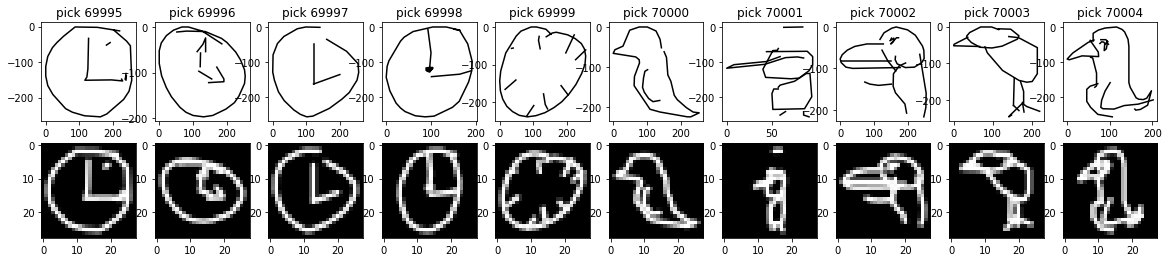

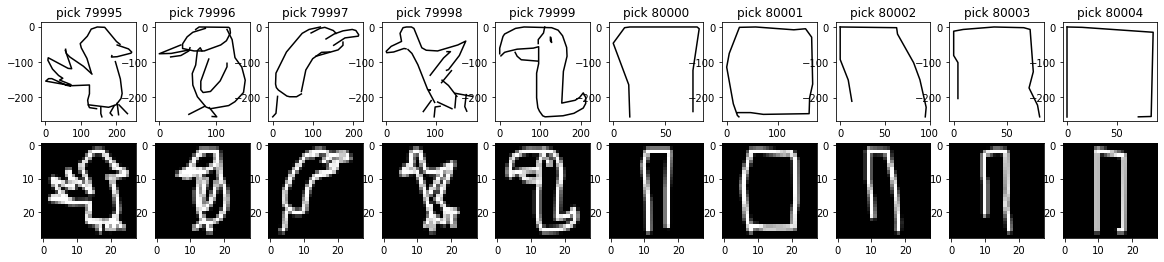

In [35]:
for k in range(len(cats)-1):
    print_vect_pix(df_assembled, 9995+10_000*k)

2) shuffle rows

In [36]:
df_shuffled = df_assembled.sample(frac=1).reset_index(drop=True)

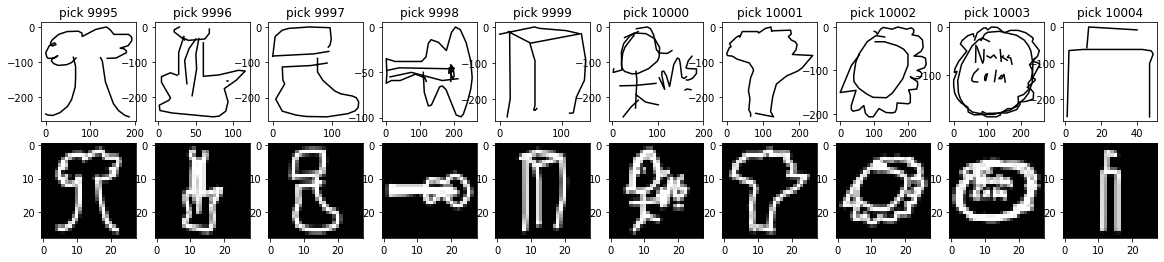

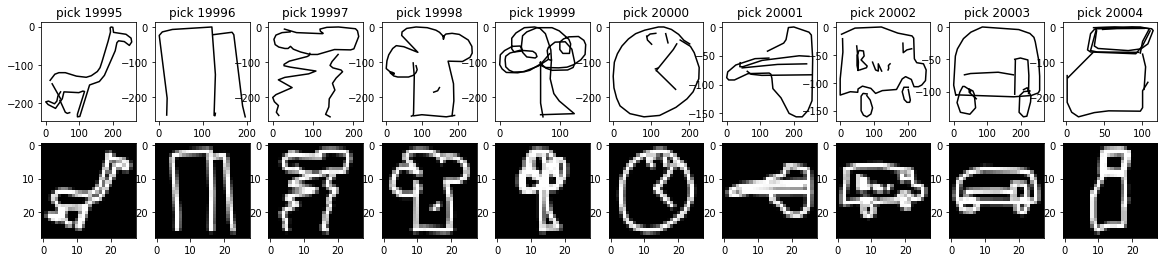

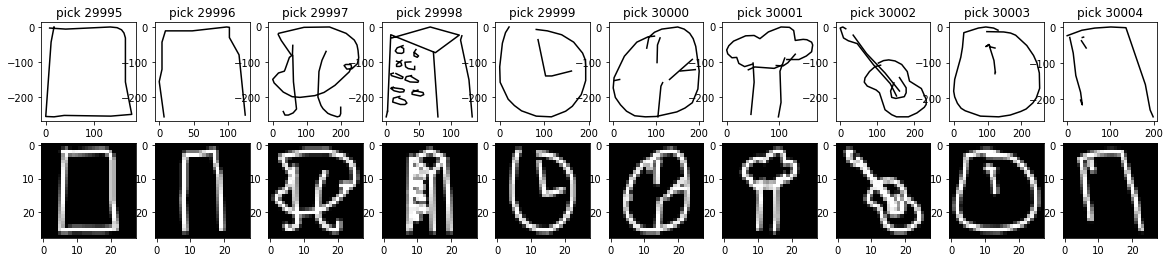

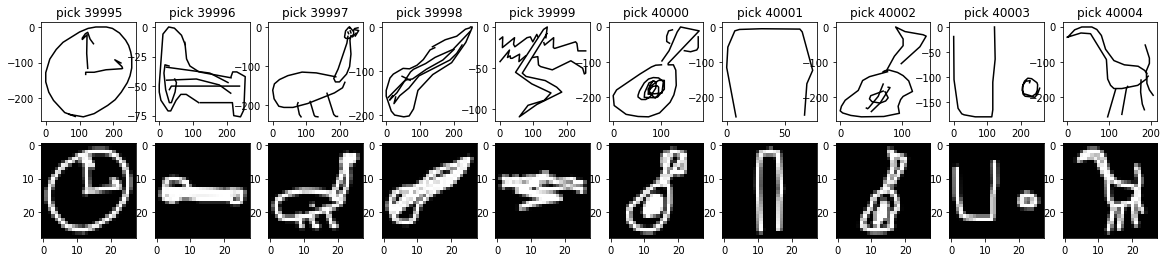

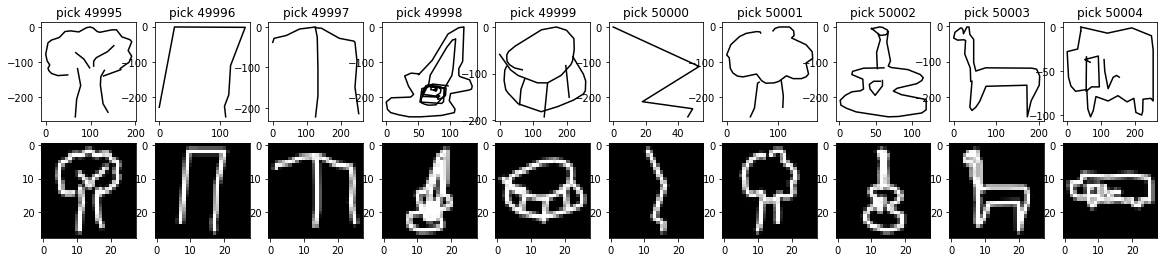

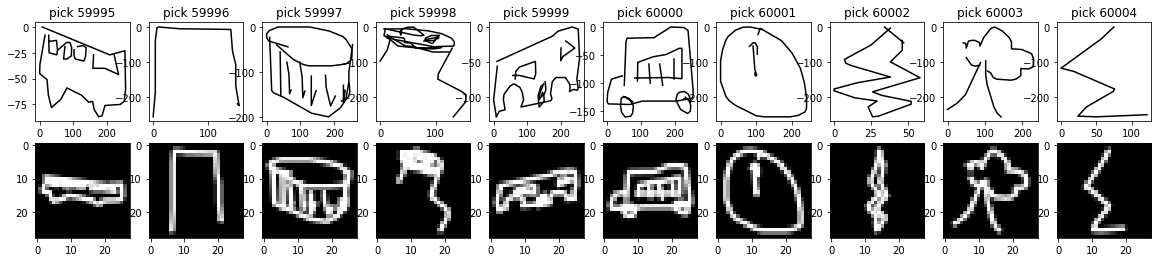

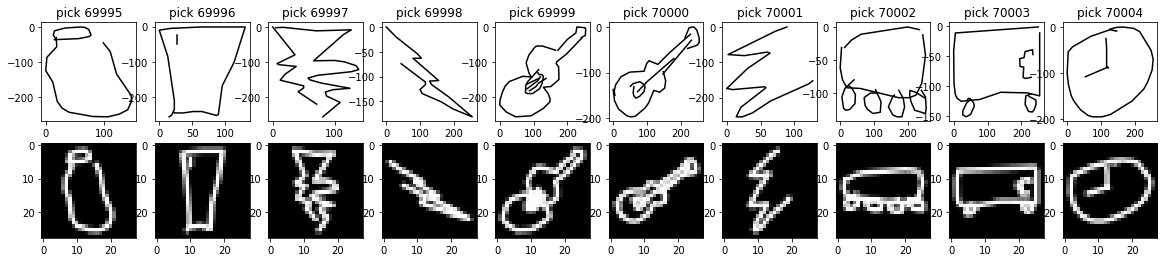

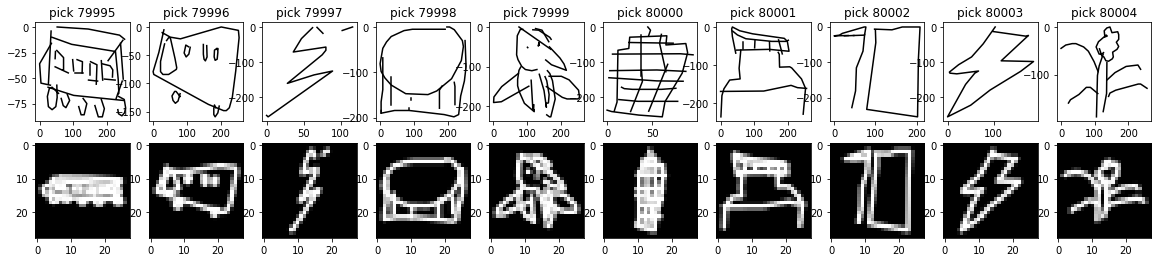

In [37]:
for k in range(len(cats)-1):
    print_vect_pix(df_shuffled, 9995+10_000*k)

In [39]:
df_shuffled = df_shuffled[['word', 'drawing', 'np_dwg']]

In [40]:
df_shuffled

,word,drawing,np_dwg
0,skyscraper,"[[[0, 9, 16, 19, 18], [0, 21, 78, 132, 255]], ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,clock,"[[[223, 194, 157, 115, 96, 58, 39, 15, 2, 0, 5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,tree,"[[[183, 197, 212, 217, 221, 216, 198, 160, 153...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,bottlecap,"[[[42, 28, 25, 25, 30, 75, 90, 141, 153, 155, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,parrot,"[[[110, 110, 128], [173, 181, 214]], [[125, 11...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
89995,bottlecap,"[[[145, 120, 82, 59, 32, 17, 17, 21, 48, 73, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
89996,bottlecap,"[[[70, 61, 45, 43, 62, 123, 135, 173, 243, 255...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
89997,parrot,"[[[157, 138, 128, 109, 99, 94, 94, 101, 99, 85...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
89998,bottlecap,"[[[63, 148, 162, 246, 255, 231, 224, 220, 220,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


3) save dataset

In [42]:
df_shuffled.to_json('../raw_data/Assembled datasets/nine_shuffled_cats.ndjson',
           orient="records",
           lines=True)

In [43]:
verif = map(json.loads, open('../raw_data/Assembled datasets/nine_shuffled_cats.ndjson'))
df_verif = pd.DataFrame.from_records(verif)
df_verif

,word,drawing,np_dwg
0,skyscraper,"[[[0, 9, 16, 19, 18], [0, 21, 78, 132, 255]], ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,clock,"[[[223, 194, 157, 115, 96, 58, 39, 15, 2, 0, 5...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,tree,"[[[183, 197, 212, 217, 221, 216, 198, 160, 153...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,bottlecap,"[[[42, 28, 25, 25, 30, 75, 90, 141, 153, 155, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,parrot,"[[[110, 110, 128], [173, 181, 214]], [[125, 11...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...
89995,bottlecap,"[[[145, 120, 82, 59, 32, 17, 17, 21, 48, 73, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
89996,bottlecap,"[[[70, 61, 45, 43, 62, 123, 135, 173, 243, 255...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
89997,parrot,"[[[157, 138, 128, 109, 99, 94, 94, 101, 99, 85...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
89998,bottlecap,"[[[63, 148, 162, 246, 255, 231, 224, 220, 220,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
